In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn')

In [46]:
!cd zippedData/
!pwd
!ls

/Users/mitchellkrieger/Documents/Flatiron/Phase 1/Phase-1-project
CONTRIBUTING.md          README.md                student.ipynb
LICENSE.md               Untitled.ipynb           zippedData
Project dataframes.ipynb awesome.gif


In [47]:
rt_review_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')

In [48]:
rt_review_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
imdb_title_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_df.isna().sum()
imdb_title_df.drop(['original_title'],axis=1, inplace = True)
imdb_title_df.duplicated().sum()

0

In [5]:
imdb_title_df.genres.str.contains('Action')

0          True
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142      NaN
146143    False
Name: genres, Length: 146144, dtype: object

In [6]:
imdb_title_df.head(10)

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,2012,82.0,Biography


In [7]:
imdb_title_df.start_year.unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027])

In [8]:
imdb_name_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_name_df.drop(['birth_year','death_year', 'primary_profession'], axis=1, inplace= True)


In [9]:
imdb_name_df.head()

,nconst,primary_name,known_for_titles
0,nm0061671,Mary Ellen Bauder,"tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"tt0452644,tt0452692,tt3458030,tt2178256"


In [10]:
type(imdb_name_df.known_for_titles.iloc[0])

str

In [11]:
##### Remove all non US region rows, language column, attributes column, is_original_title column
imdb_title_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_akas_df.rename({'title_id':'tconst'}, axis=1, inplace = True)
imdb_title_akas_df.loc[imdb_title_akas_df['region'] == 'US']

,tconst,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
331645,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,NaN,imdbDisplay,NaN,0.0
331654,tt9358044,2,Hail Satan?,US,NaN,imdbDisplay,NaN,0.0
331673,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0


In [12]:
imdb_title_akas_df.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [13]:
imdb_title_akas_df.is_original_title.unique()

array([ 0.,  1., nan])

In [14]:
imdb_title_akas_df['region'].value_counts()

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
       ...  
WF         1
SB         1
XNA        1
LY         1
EH         1
Name: region, Length: 213, dtype: int64

In [15]:
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

In [16]:
imdb_title_crew_df.head()
#imdb_title_crew_df.isna().sum()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [17]:
imdb_principles_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

In [18]:
imdb_principles_df.head(10)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


In [19]:
imdb_principles_df.loc[imdb_principles_df['ordering'] == 10]

,tconst,ordering,nconst,category,job,characters
3,tt0323808,10,nm0059247,editor,NaN,NaN
13,tt0417610,10,nm0284261,composer,NaN,NaN
23,tt0469152,10,nm3745712,editor,NaN,NaN
36,tt0475290,10,nm0005683,cinematographer,director of photography,NaN
46,tt0477302,10,nm0579580,cinematographer,director of photography,NaN
...,...,...,...,...,...,...
1028075,tt9581844,10,nm0886829,cinematographer,NaN,NaN
1028085,tt9581996,10,nm2984088,cinematographer,NaN,NaN
1028121,tt9670776,10,nm10512345,actor,NaN,NaN
1028131,tt9670894,10,nm10435886,producer,producer,NaN


In [20]:
imdb_title_rating_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_rating_df.drop(['numvotes'], axis = 1, inplace = True)

In [21]:
imdb_title_rating_df.head()



,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


In [22]:
bom_movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')


In [23]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
movie_budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [25]:
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)




In [26]:
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].str.replace('$','').str.replace(',','').astype(int)
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].str.replace('$','').str.replace(',','').astype(int)


In [27]:
movie_budget_df['worldwide_net'] = movie_budget_df['worldwide_gross'] - movie_budget_df['production_budget']

In [28]:
movie_budget_df['percent_gross'] = (movie_budget_df['worldwide_net'] / movie_budget_df['production_budget'])*100
movie_budget_df.rename({'movie':'primary_title'}, axis = 1, inplace = True)
movie_budget_df.drop(['release_date'],axis = 1, inplace = True)

In [29]:
movie_budget_df.drop(['id'],axis = 1, inplace = True)

In [30]:
movie_budget_df.head()

,primary_title,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross
0,Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636


In [31]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')


In [32]:
joined_table = imdb_title_df.merge(movie_budget_df, how='left', on = 'primary_title')


In [33]:
imdb_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [34]:
joined_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146353 entries, 0 to 146352
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             146353 non-null  object 
 1   primary_title      146353 non-null  object 
 2   start_year         146353 non-null  int64  
 3   runtime_minutes    114581 non-null  float64
 4   genres             140940 non-null  object 
 5   production_budget  3815 non-null    float64
 6   domestic_gross     3815 non-null    float64
 7   worldwide_gross    3815 non-null    float64
 8   worldwide_net      3815 non-null    float64
 9   percent_gross      3815 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 12.3+ MB


In [35]:
joined_table.isna().sum()
joined_table.dropna(subset = ['production_budget'], inplace = True)


In [45]:
droped_genres_dataframe = joined_table.dropna(subset = ['genres'])

In [59]:
no_zero_gross = droped_genres_dataframe.loc[(droped_genres_dataframe.domestic_gross > 0) & (droped_genres_dataframe.worldwide_gross >0)]


no_zero_gross.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 33 to 146287
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             3214 non-null   object 
 1   primary_title      3214 non-null   object 
 2   start_year         3214 non-null   int64  
 3   runtime_minutes    2853 non-null   float64
 4   genres             3214 non-null   object 
 5   production_budget  3214 non-null   float64
 6   domestic_gross     3214 non-null   float64
 7   worldwide_gross    3214 non-null   float64
 8   worldwide_net      3214 non-null   float64
 9   percent_gross      3214 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 276.2+ KB


In [61]:
genre_list = ['Action','Adventure','Fantasy','Drama','Romance','Comedy','Sci-Fi','Biography','Documentary','Thriller','Animation','Crime','Documentary','Family','History','Horror','Musical','Myster','War','Western']
def genre_dataframe_select(genre):
    return no_zero_gross.loc[no_zero_gross.genres.str.contains(genre)]



In [64]:

def genre_vs_net (genre,ax):
    df = genre_dataframe_select(genre)
    y = df.groupby(['start_year'])['worldwide_net'].mean()[:10]
    x = y.index
    
    ax.bar(x, y)
    ax.set_title(f'{genre}')
    ax.set_xticks([])
    ax.set_ylim(bottom=0,top= 5.5e8)
    return ax


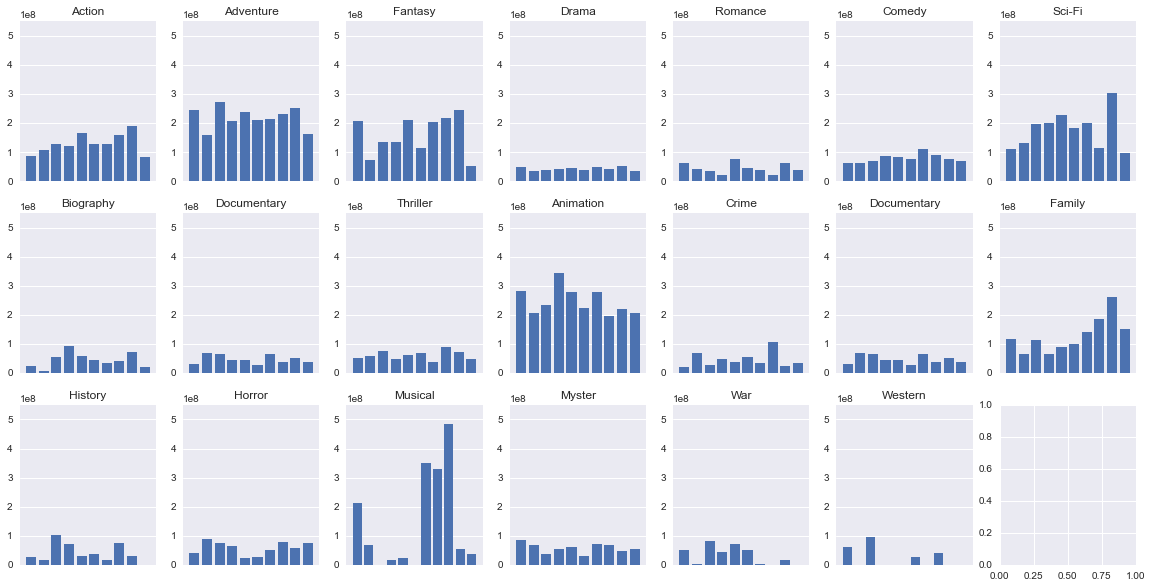

In [65]:
figure, ax = plt.subplots(figsize = (20,10),ncols=7, nrows=3)
for i,genre in enumerate(genre_list):
    col = i%7
    row = i//7
    genre_vs_net(genre,ax[row][col])


Text(0, 0.5, 'Avg Net Profit')

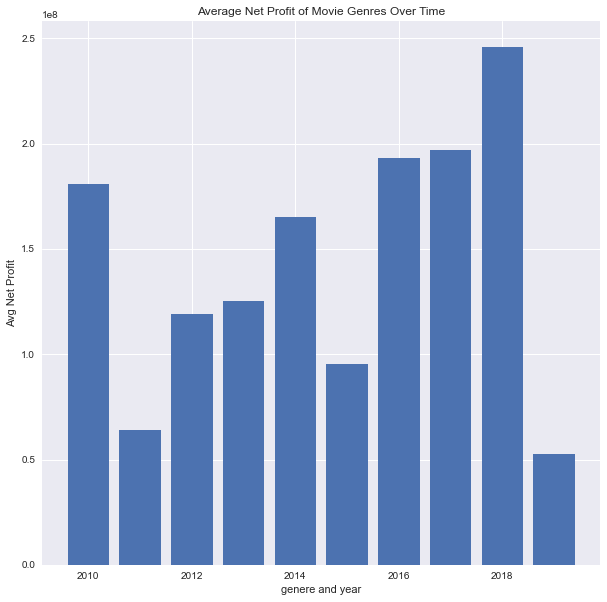

In [157]:
y = Fantasy.groupby(['start_year'])['worldwide_net'].mean()[:-1]
x = y.index
figure, ax = plt.subplots(figsize = (10,10))
ax.bar(x, y)

ax.set_title('Average Net Profit of Movie Genres Over Time')
ax.set_xlabel('year')
ax.set_ylabel('Avg Net Profit')

In [68]:
droped_genres_dataframe.genres.value_counts()

Drama                         497
Documentary                   290
Comedy                        140
Comedy,Drama                  104
Horror                         95
                             ... 
Action,Fantasy,Western          1
Comedy,Fantasy,Musical          1
Action,Comedy,Documentary       1
Documentary,Sport,Thriller      1
Adventure,Comedy,Romance        1
Name: genres, Length: 345, dtype: int64

In [83]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [84]:
rt_movie_info.shape

(1560, 12)

In [85]:
rt_movie_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [86]:
rt_review_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
